# Name : Md Imamuddin

#Step1: Data Loading

Loading the dataset :  I will start by loading the dataset using pandas and check the first few rows.

In [10]:
import pandas as pd

#Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Student/student-mat.csv',sep=';')

#Display the first 5 rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#Step 2: Data Exploration

Exploring the data : Lets understand the datset's structure, check for missing values,and see the data type.

In [11]:
#Check for missing values
print("Missing values in each coloumn: ")
print(data.isnull().sum())

#Check data types of each coloumn
print("\nData tpes:")
print(data.dtypes)

#Check dataset size (rows , coloumn)
print("\nDataset Shape:")
print(data.shape)

Missing values in each coloumn: 
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data tpes:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       o

#Step3: Data Cleaning
Cleaning the data: I will handle missing values (if any) and remove duplicates to ensure data quality.

In [12]:
#Drop rows with missing values (if any)
data = data.dropna()

#remove duplicate rows
data = data.drop_duplicates()

#Check again the shape after cleaning
print("\nDataset Shape after cleaning:")
print(data.shape)


Dataset Shape after cleaning:
(395, 33)


#Step 4: Data Analysis Question
Q1. What is the average score in math (G3)?

In [14]:
average_g3 = data['G3'].mean()
print("Average Final Grade (G3):",average_g3)


Average Final Grade (G3): 10.415189873417722


Q2.How many students scored above 15 in their final grade (G3)?.

In [16]:
above_15_count = (data['G3']>15).sum()
print("Number of students scoring above 15:",above_15_count)

Number of students scoring above 15: 40


Q3. Is there a correlation between study time (study time) and the final grade (G3)?


In [18]:
import numpy as np
correlation = np.corrcoef(data['studytime'],data['G3'])[0,1]
print("Correlation between study time and final grade:",correlation)

Correlation between study time and final grade: 0.09781968965319626


Q4. Which gender has a higher average final grade (G3)?


In [19]:
average_g3_by_gender = data.groupby('sex')['G3'].mean()
higher_average_gender = average_g3_by_gender.idxmax()
print("Gender with higher average final grade:",higher_average_gender)

Gender with higher average final grade: M


#Step 5: Data Visualization

#Histogram: Final Grades (G3)
Q1. Plot a histogram of final grades (G3

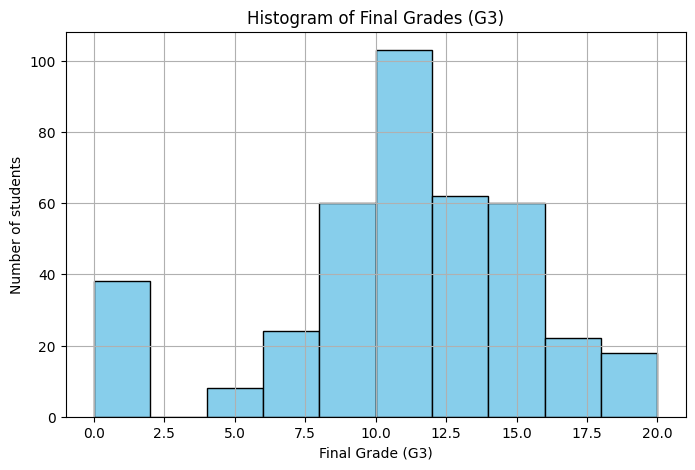

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(data['G3'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of students')
plt.title('Histogram of Final Grades (G3)')
plt.grid(True)
plt.show()

Q2. Create a scatter plot between study time (study time) and final grade (G3)
#Scatter Plot : time vs Final Grade(G3)

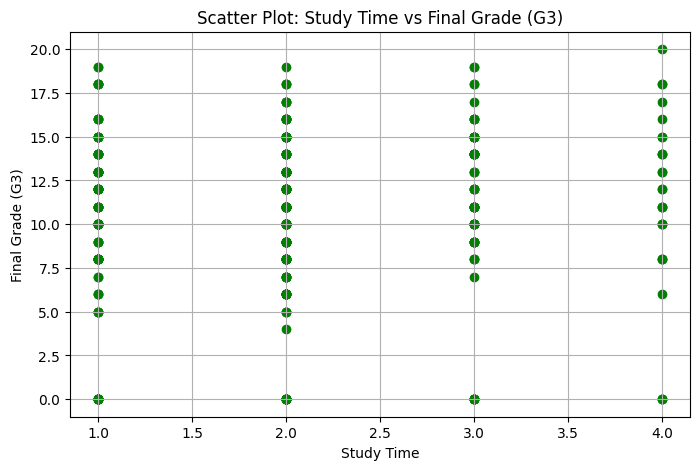

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(data['studytime'],data['G3'],color='green')
plt.title('Scatter Plot: Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.title('Scatter Plot: Study Time vs Final Grade (G3)')
plt.grid(True)
plt.show()

Q3. Create a bar chart comparing the average scores of male and female students.

#Bar Chart : Gender-wise Average Final Grade

<ipython-input-28-2e07ee6707ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='average_g3', data=average_df, palette='pastel')


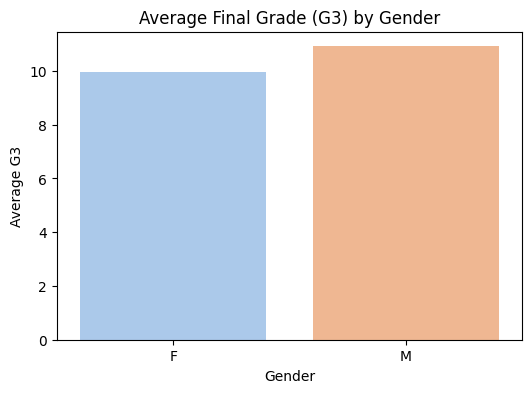

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'sex' and calculate average G3
average_by_gender = data.groupby('sex')['G3'].mean()

# Step 2: Convert the result to a DataFrame for Seaborn
average_df = average_by_gender.reset_index()
average_df.columns = ['sex', 'average_g3']  # Use lowercase here

# Step 3: Plot the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='average_g3', data=average_df, palette='pastel')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.show()